#  PySOQCS Example 9: Dielectric film with losses.

Calculation of the output probabilities for a small dielectric film acting as a beamsplitter. The resulting values coincide with the ones reported in ref. [1]

## Description:

<p style='text-align: justify;'> We consider a circuit made of single dielectric thin film as studied in [1]. We repoduce numerically the results presented in Figs 2 and 3 of the same ref. [1] obtained by means of analytical calculations to validate the loss model in SOQCS. Each of the figures corresponf to the cases where two photons are injected in the dielectric from the same direction or from opposite ones. Here, both situations are considered as two different input channels  therefore we plot the different outcome probabilities as function of the transmission amplitude |t| for each of the  two cases | 2, 0 > and | 1, 1 >.</p>
<br>
<br>
[1] Stephen M. Barnett, et Al.  <i>Quantum optics of lossy beam splitters.</i> <b> Physical Review A Volume 57 Number 3</b> (1998)

## Code:

Import SOQCS and some extra libraries needed to print the results.

In [1]:
import pysoqcs as soqcs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## | 2, 0 > input.

### SOQCS Circuit.

<p style='text-align: justify;'> Function that contains the SOQCS calculation of the output of the dielectric given a transmission amplitude t for the case when the input is | 2, 0 > <br>.
<br>
<b>Note: </b> This is not the most
efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demonstration purposes therefore it is intended to be simple. </p>

In [2]:
def DieProb(x,args):
    #Obtain t
    t=np.sqrt(x/2.0)
    #Build the circuit
    example = soqcs.qodev(nph=2, nch=2, nm=1, ns=2, clock=0, R=0, loss=True)
    example.add_photons(2,0,0, 0.0, 1.0,1.0)
    example.dielectric(0,1,t,1j* t)
    example.detector(0);
    example.detector(1);

    # Create a simulator and run the simulation
    sim=soqcs.simulator()
    measured=sim.run(example)
       
    term=[[0      ,      1],
          [args[0],args[1]]]
    prob=measured.prob(term,example)    
    return prob

### Results.

* | 2, 0 >: Black
* | 1, 1 >: Red
* | 1, 0 >: Green
* | 0, 2 >: Yellow
* | 0, 1 >: Blue
* | 0, 0 >: Purple

Some colors may not be vissible if two plots are equal ( for example | 2, 0 > and | 0, 2 > ).

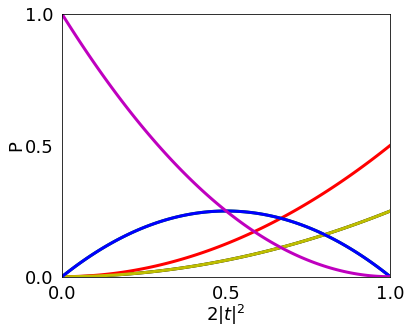

In [3]:
      #Arg1  #Arg2
args=[{0:2,  1:0},  #Plot 1
      {0:1,  1:1},  #Plot 2
      {0:1,  1:0},  #Plot 3 
      {0:0,  1:2},  #Plot 4 
      {0:0,  1:1},  #Plot 5 
      {0:0,  1:0}]  #Plot 6

soqcs.plot(DieProb,6,5,'$2|t|^2$', 0.0, 0.9999, 3 ,'P', 0.0 , 1.0, 3, 100, args,['k','r','g','y','b','m'])

## | 1, 1 > input.

### SOQCS Circuit.

<p style='text-align: justify;'> Function that contains the SOQCS calculation of the output of the dielectric given a transmission amplitude t for the case when the input is | 2, 0 > <br>.
<br>
<b>Note: </b> This is not the most
efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demonstration purposes therefore it is intended to be simple. </p>

In [4]:
def DieProb(x,occ1,occ2):  
    # Obtain t
    t=np.sqrt(x/2.0)
    
    #Build the circuit
    example = soqcs.qodev(nph=2, nch=2, nm=1, ns=2, clock=0, R=0, loss=True)
    example.add_photons(1,0,0, 0.0, 1.0,1.0)
    example.add_photons(1,1,0, 0.0, 1.0,1.0)
    example.dielectric(0,1,t,t)
    example.detector(0,);
    example.detector(1);

    # Create a simulator and run the simulation
    sim=soqcs.simulator()
    measured=sim.run(example)
    
    term=[[0,1],
          [occ1,occ2]]
    prob=measured.prob(term,example)    
    return prob

### Sum function

In this case the interest is to give the total probability of detecting at the output 0, 1 or 2 photons independently of the channel where those are detected. Therefore whe need to sum the probabilities of the different outcomes that contain 0, 1 or 2 photons in each case.

In [5]:
def DieSumProb(x,args):  
    if(args[0]==2):
        probs1=DieProb(x,2,0)
        probs2=DieProb(x,1,1)
        probs3=DieProb(x,0,2)
        probs=probs1+probs2+probs3
        
    if(args[0]==1):
        probs1=DieProb(x,1,0)
        probs2=DieProb(x,0,1)
        probs=probs1+probs2
        
    if(args[0]==0):
        probs=DieProb(x,0,0)

    return probs

### Results.

* | 2 >: Black
* | 1 >: Red
* | 0 >: Green

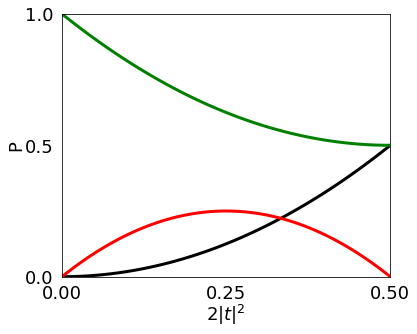

In [6]:
soqcs.plot(DieSumProb,6,5,'$2|t|^2$', 0.0, 0.5, 3 ,'P', 0.0 , 1.0, 3, 100, [{0:2},{0:1},{0:0}],['k','r','g'])

<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>